# Classification of Delhi Metro stations

# INTRODUCTION

In [7]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim 
# convert an address into latitude and longitude values

import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [8]:
import requests
import lxml.html as lh
import pandas as pd
from bs4 import BeautifulSoup

In [9]:
address = 'Delhi, India'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Delhi are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Delhi are 28.6517178, 77.2219388.


In [10]:
map_delhi = folium.Map(location=[latitude, longitude], zoom_start=11)  
map_delhi.save(outfile= "test_map.html")
map_delhi

In [11]:
from bs4 import BeautifulSoup

wiki_url = 'https://en.wikipedia.org/wiki/List_of_Delhi_Metro_stations'
wiki_page = requests.get(wiki_url).text
wiki_doc = BeautifulSoup(wiki_page, 'lxml')

rows = wiki_doc.find('table', {'class': 'wikitable sortable'}).findAll('tr')


df = pd.DataFrame()
 


lst = []
form = '{ "name": "%s",\
          "details": {"line":"[%s]",\
                      "latitude":0.0,\
                      "longitude":0.0 }}'
Station=[]
Line = []
for row in rows[1:]:
    items = row.find_all('td')
    try:
        if len(items)==8:
            Station.append(items[0].find('a').contents[0])
            Line.append(items[2].find('a').find('span').find('b').contents[0])
            lst.append(form % (items[0].find('a').contents[0],
               items[2].find('a').find('span').find('b').contents[0]))
    
    except Exception as e:
        continue

string = '['+','.join(lst)+']'
data = json.loads(string)

f = open('metro.json', 'w+')
f.write(json.dumps(data, indent=4))
f.close()

In [12]:
print(len(Station))
print(len(Line))

229
229


In [13]:
df['Station']=Station
df['Line']=Line
df

,Station,Line
0,Adarsh Nagar,Yellow
1,AIIMS,Yellow
2,Akshardham,Blue Line
3,Anand Vihar ISBT,Blue Line Branch
4,Arjan Garh,Yellow
5,Arthala,Red Line
6,Ashok Park Main,Green Line
7,Ashram,Pink Line
8,Azadpur,Yellow
9,Badarpur Border,Violet Line


In [14]:

Latitude = []
Longitude = []
for stat in Station:
    try:
        try:
            try:
                address = "{} metro station, Delhi, India".format(stat)
                geolocator = Nominatim(user_agent="ny_explorer")
                location = geolocator.geocode(address)
                lat = location.latitude
                long = location.longitude
            except Exception as e:
                address = "{}, Delhi, India".format(stat)
                geolocator = Nominatim(user_agent="ny_explorer")
                location = geolocator.geocode(address)
                lat = location.latitude
                long = location.longitude
        except Exception as e:
            address = "{}, India".format(stat)
            geolocator = Nominatim(user_agent="ny_explorer")
            location = geolocator.geocode(address)
            lat = location.latitude
            long = location.longitude
    except Exception as d:
        lat=None
        long=None
    Latitude.append(lat)
    Longitude.append(long)

In [15]:
df['Latitude'] = Latitude
df['Longitude'] = Longitude
df.head(20)

,Station,Line,Latitude,Longitude
0,Adarsh Nagar,Yellow,28.716580,77.170422
1,AIIMS,Yellow,28.569114,77.211852
2,Akshardham,Blue Line,28.617842,77.279488
3,Anand Vihar ISBT,Blue Line Branch,28.649052,77.318284
4,Arjan Garh,Yellow,28.480735,77.125762
5,Arthala,Red Line,28.676999,77.391892
6,Ashok Park Main,Green Line,28.671605,77.155291
7,Ashram,Pink Line,28.572423,77.258598
8,Azadpur,Yellow,28.706566,77.179648
9,Badarpur Border,Violet Line,28.493283,77.303366


In [70]:
df.to_csv('DELHI_METRO_DATA.csv',index=False)
df=pd.read_csv('DELHI_METRO_DATA.csv')
df

,Station,Line,Latitude,Longitude
0,Adarsh Nagar,Yellow,28.716580,77.170422
1,AIIMS,Yellow,28.569114,77.211852
2,Akshardham,Blue Line,28.617842,77.279488
3,Anand Vihar ISBT,Blue Line Branch,28.649052,77.318284
4,Arjan Garh,Yellow,28.480735,77.125762
5,Arthala,Red Line,28.676999,77.391892
6,Ashok Park Main,Green Line,28.671605,77.155291
7,Ashram,Pink Line,28.572423,77.258598
8,Azadpur,Yellow,28.706566,77.179648
9,Badarpur Border,Violet Line,28.493283,77.303366


In [71]:
linetonum = {"Yellow Line": 1, "Red Line": 2,"Blue Line": 3,'Blue Line branch':3, "Pink Line": 4,
             "Magenta Line": 5, "Green Line": 6,
             'Green Line branch':6, "Violet Line": 7, "Orange Line": 8,"Grey Line": 9}

In [72]:
data = df.dropna(axis=0)
data

,Station,Line,Latitude,Longitude
0,Adarsh Nagar,Yellow,28.716580,77.170422
1,AIIMS,Yellow,28.569114,77.211852
2,Akshardham,Blue Line,28.617842,77.279488
3,Anand Vihar ISBT,Blue Line Branch,28.649052,77.318284
4,Arjan Garh,Yellow,28.480735,77.125762
5,Arthala,Red Line,28.676999,77.391892
6,Ashok Park Main,Green Line,28.671605,77.155291
7,Ashram,Pink Line,28.572423,77.258598
8,Azadpur,Yellow,28.706566,77.179648
9,Badarpur Border,Violet Line,28.493283,77.303366


In [82]:
data.replace({"Line": linetonum},inplace=True)
data.replace("Yellow",1, inplace=True)
data.replace("Green Line Branch",6, inplace=True)
data.Line

0      1
1      1
2      3
3      2
4      1
5      2
6      6
7      4
8      1
9      7
11     6
12     3
13     7
14     4
15     3
16     6
17     1
18     1
19     1
20     1
21     5
22     1
23     5
24     5
25     8
26     4
27     7
28     8
29     2
30     4
31     3
32     3
33     3
34     3
35     3
36     3
37     3
38     3
39     3
40     3
41     4
42     4
43     7
45     6
46     1
47     4
48     3
49     7
50     5
51     1
52     1
53     1
54     1
55     7
56     1
57     4
58     2
59     1
60     1
61     5
62     1
63     2
64     8
65     3
66     4
67     7
68     4
69     1
70     7
71     5
72     3
73     3
74     7
75     7
76     7
77     5
78     7
79     3
80     2
81     4
82     1
83     7
84     5
85     7
86     2
87     2
88     4
89     3
90     2
91     2
92     2
93     7
94     3
95     4
96     2
97     7
98     7
99     2
100    1
101    6
103    4
104    2
105    1
106    4
107    3
108    2
109    4
110    4
111    3
112    3
113    4
1

In [83]:
data.replace("Blue Line Branch",2, inplace=True)

In [84]:
data

,Station,Line,Latitude,Longitude
0,Adarsh Nagar,1,28.716580,77.170422
1,AIIMS,1,28.569114,77.211852
2,Akshardham,3,28.617842,77.279488
3,Anand Vihar ISBT,2,28.649052,77.318284
4,Arjan Garh,1,28.480735,77.125762
5,Arthala,2,28.676999,77.391892
6,Ashok Park Main,6,28.671605,77.155291
7,Ashram,4,28.572423,77.258598
8,Azadpur,1,28.706566,77.179648
9,Badarpur Border,7,28.493283,77.303366


In [85]:
colors_dict = {1:'#FFFF00', 2:'#FF0000',3:'#0000FF', 4:'#FFC0CB',5:'#FF00FF', 6:'#008000',7:'#EE82EE', 
               8:'#FFA500',9:'#808080'}

In [86]:
address = 'Delhi, India'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Delhi are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Delhi are 28.6517178, 77.2219388.


In [91]:
map_delhi_metro = folium.Map(location=[latitude, longitude], zoom_start=10)

for line, station, lat,long in zip(data['Line'], data['Station'],data['Latitude'], data['Longitude']):
    folium.Circle(
        [lat,long],
        popup=station,
        radius=20,
        color=colors_dict[line]
    ).add_to(map_delhi_metro)
map_delhi_metro.save(outfile= "outlier_map.html")
map_delhi_metro

In [87]:
data.at[97,'Latitude'] = 28.656682
data.at[97,'Longitude'] = 77.236612
data

,Station,Line,Latitude,Longitude
0,Adarsh Nagar,1,28.716580,77.170422
1,AIIMS,1,28.569114,77.211852
2,Akshardham,3,28.617842,77.279488
3,Anand Vihar ISBT,2,28.649052,77.318284
4,Arjan Garh,1,28.480735,77.125762
5,Arthala,2,28.676999,77.391892
6,Ashok Park Main,6,28.671605,77.155291
7,Ashram,4,28.572423,77.258598
8,Azadpur,1,28.706566,77.179648
9,Badarpur Border,7,28.493283,77.303366


In [88]:
# Sort the rows of dataframe by column 'Line'
data_sort = data.sort_values(by ='Line' )
data_sort


,Station,Line,Latitude,Longitude
0,Adarsh Nagar,1,28.716580,77.170422
52,GTB Nagar,1,28.696038,77.205932
53,Guru Dronacharya,1,28.482021,77.102269
54,Haiderpur,1,28.730121,77.149403
56,Hauz Khas,1,28.544256,77.206707
59,HUDA City Centre,1,28.459343,77.072657
60,IFFCO Chowk,1,28.477172,77.068221
62,INA,1,28.575120,77.209431
69,Jahangirpuri,1,28.725972,77.162658
82,Jor Bagh,1,28.586598,77.212534


In [89]:
data_sort.dtypes

Station       object
Line           int64
Latitude     float64
Longitude    float64
dtype: object

In [90]:
map_delhi_metro = folium.Map(location=[latitude, longitude], zoom_start=10)
#add markers
for line, station, lat,long in zip(data_sort['Line'], data_sort['Station'],data_sort['Latitude'], data_sort['Longitude']):
    folium.Circle(
        [lat,long],
        popup=station,
        radius=30,
        fill=True,
        color=colors_dict[line]
    ).add_to(map_delhi_metro)   

map_delhi_metro

# Methodology

In [93]:
CLIENT_ID = 'XKWBA0LW2HDJDQNZZJ01ME1MQA4IUFKX0WHKQL2D0N3LSDQB'
CLIENT_SECRET = 'W1EXMCPMF14NQR2CI2MSU1MQCSPXH0SMDC42JOLGCPONDWQY'
VERSION = '20180605'

In [94]:
categories_url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
            
# make the GET request
results = requests.get(categories_url).json()

In [95]:
categories_list = []
# Let's print only the top-level categories and their IDs and also add them to categories_list

def print_categories(categories, level=0, max_level=0):    
    if level>max_level: return
    out = ''
    out += '-'*level
    for category in categories:
        print(out + category['name'] + ' (' + category['id'] + ')')
        print_categories(category['categories'], level+1, max_level)
        categories_list.append((category['name'], category['id']))
        
print_categories(results['response']['categories'], 0, 0)

Arts & Entertainment (4d4b7104d754a06370d81259)
College & University (4d4b7105d754a06372d81259)
Event (4d4b7105d754a06373d81259)
Food (4d4b7105d754a06374d81259)
Nightlife Spot (4d4b7105d754a06376d81259)
Outdoors & Recreation (4d4b7105d754a06377d81259)
Professional & Other Places (4d4b7105d754a06375d81259)
Residence (4e67e38e036454776db1fb3a)
Shop & Service (4d4b7105d754a06378d81259)
Travel & Transport (4d4b7105d754a06379d81259)


In [96]:
def get_venues_count(lat,long, radius, categoryId):
    explore_url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION,
                lat,
                long,
                radius,
                categoryId)
    try:
        return requests.get(explore_url).json()['response']['totalResults']
    except Exception as e:
        return 0

In [97]:
data_sort.reset_index(inplace=True,drop=True)
data_sort

,Station,Line,Latitude,Longitude
0,Adarsh Nagar,1,28.716580,77.170422
1,GTB Nagar,1,28.696038,77.205932
2,Guru Dronacharya,1,28.482021,77.102269
3,Haiderpur,1,28.730121,77.149403
4,Hauz Khas,1,28.544256,77.206707
5,HUDA City Centre,1,28.459343,77.072657
6,IFFCO Chowk,1,28.477172,77.068221
7,INA,1,28.575120,77.209431
8,Jahangirpuri,1,28.725972,77.162658
9,Jor Bagh,1,28.586598,77.212534


In [98]:
stations_venues_df = data_sort.copy()
for c in categories_list:
    stations_venues_df[c[0]] = 0

In [107]:
for i, row in stations_venues_df[stations_venues_df.index > 179].iterrows():
    print(i)
    for c in categories_list:        
        stations_venues_df.loc[i, c[0]] = get_venues_count(stations_venues_df.Latitude.iloc[i],stations_venues_df.Longitude.iloc[i], radius=1000,categoryId=c[1])
    stations_venues_df.to_csv('stations_venues.csv')

180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223


In [111]:
stations_venues = pd.read_csv('stations_venues.csv', index_col=0)
stations_venues

,Station,Line,Latitude,Longitude,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,Adarsh Nagar,1,28.716580,77.170422,0,0,0,0,0,0,0,0,0,0
1,GTB Nagar,1,28.696038,77.205932,0,0,0,0,0,0,0,0,0,0
2,Guru Dronacharya,1,28.482021,77.102269,0,0,0,0,0,0,0,0,0,0
3,Haiderpur,1,28.730121,77.149403,0,0,0,0,0,0,0,0,0,0
4,Hauz Khas,1,28.544256,77.206707,0,0,0,0,0,0,0,0,0,0
5,HUDA City Centre,1,28.459343,77.072657,0,0,0,0,0,0,0,0,0,0
6,IFFCO Chowk,1,28.477172,77.068221,0,0,0,0,0,0,0,0,0,0
7,INA,1,28.575120,77.209431,0,0,0,0,0,0,0,0,0,0
8,Jahangirpuri,1,28.725972,77.162658,0,0,0,0,0,0,0,0,0,0
9,Jor Bagh,1,28.586598,77.212534,0,0,0,0,0,0,0,0,0,0


In [113]:
stations_venues.shape

(224, 14)

# Visualization and Modeling


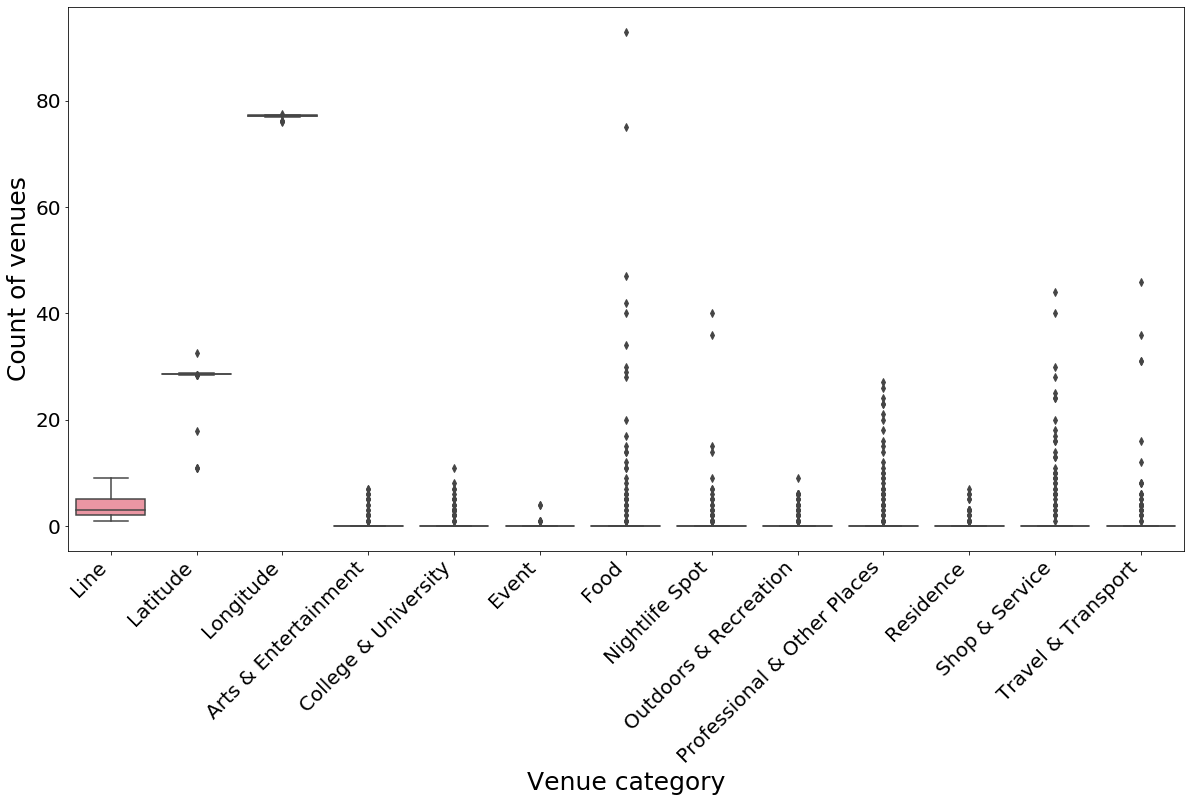

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = stations_venues)
ax.set_ylabel('Count of venues', fontsize=25)
ax.set_xlabel('Venue category', fontsize=25)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

# Venue category

In [114]:
from sklearn.preprocessing import MinMaxScaler

X = stations_venues.values[:,4:]
cluster_dataset = MinMaxScaler().fit_transform(X)

In [115]:
cluster_df = pd.DataFrame(cluster_dataset)
cluster_df.columns = [c[0] for c in categories_list]
cluster_df.head(15)

,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


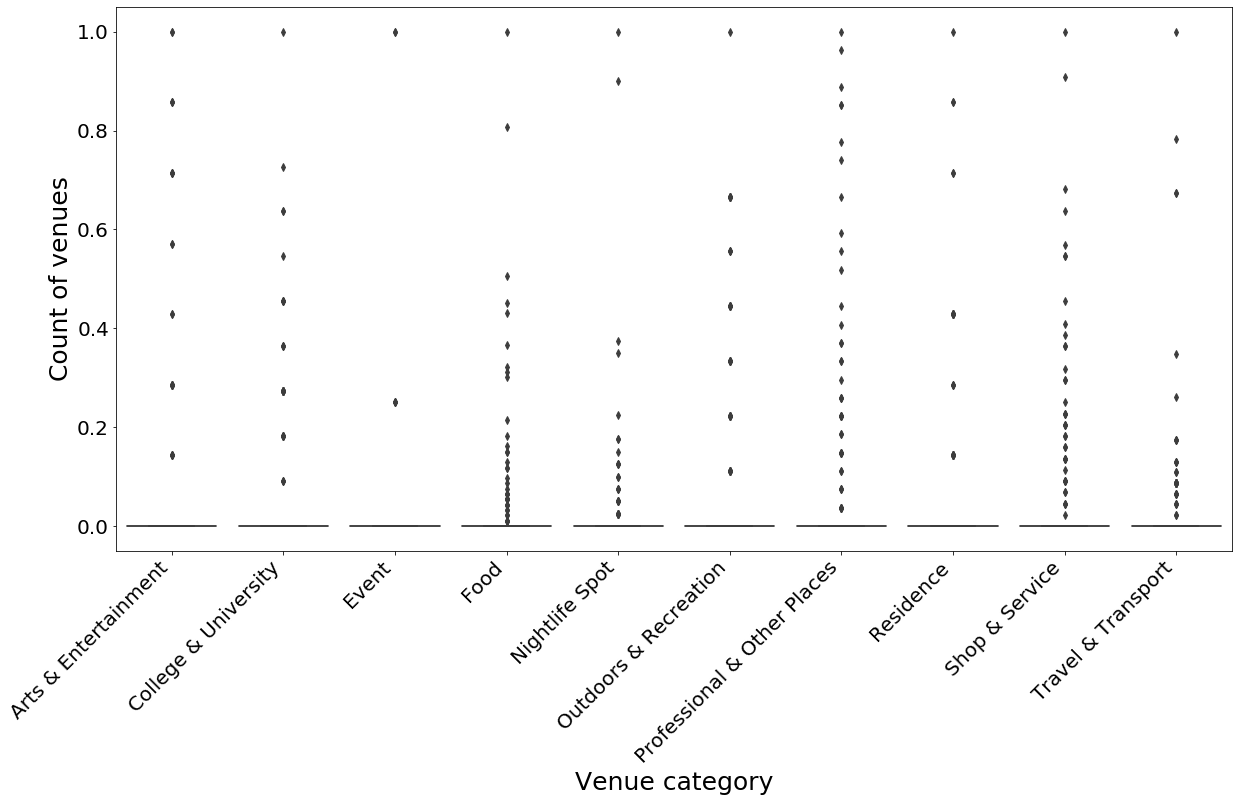

In [116]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = cluster_df)
ax.set_ylabel('Count of venues', fontsize=25)
ax.set_xlabel('Venue category', fontsize=25)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

# Clustering using KMeans Clsutering

In [117]:
from sklearn.cluster import KMeans 

Sum_of_squared_distances = []
K = range(2,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_df)
    Sum_of_squared_distances.append(km.inertia_)

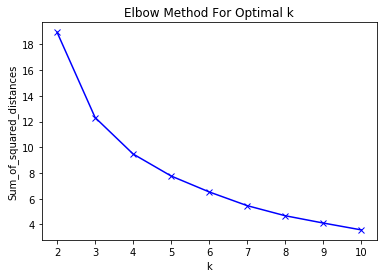

In [118]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [119]:
from sklearn.metrics import silhouette_score

In [120]:
sil = []

kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2,kmax+1):
  kmeans = KMeans(n_clusters = k).fit(cluster_df)
  labels = kmeans.labels_
  sil.append(silhouette_score(cluster_df, labels, metric = 'euclidean'))

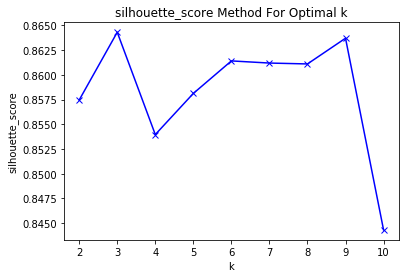

In [121]:
K1=range(2,kmax+1)
plt.plot(K1, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('silhouette_score Method For Optimal k')
plt.show()

In [122]:
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cluster_df)

kmeans_labels = kmeans.labels_
kmeans_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 0, 1, 1, 3, 0, 1, 2, 3,
       1, 3, 3, 1, 1, 1, 1, 0, 3, 1, 3, 0, 3, 1, 3, 0, 1, 3, 0, 0, 3, 2,
       3, 3, 0, 0], dtype=int32)

In [123]:
(unique, counts) = np.unique(kmeans_labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[  0 194]
 [  1  11]
 [  2   2]
 [  3  17]]


In [124]:

replace_labels = {0:3,1:1,2:2,3:0}
for i in range(len(kmeans_labels)):
    kmeans_labels[i] = replace_labels[kmeans_labels[i]]

stations_clusters_df = stations_venues.copy()
stations_clusters_df['Cluster'] = kmeans_labels
stations_clusters_minmax_df = cluster_df.copy()
stations_clusters_minmax_df['Cluster'] = kmeans_labels
stations_clusters_minmax_df['Station'] = stations_venues['Station']
stations_clusters_minmax_df['Latitude'] = stations_venues['Latitude']
stations_clusters_minmax_df['Longitude'] = stations_venues['Longitude']

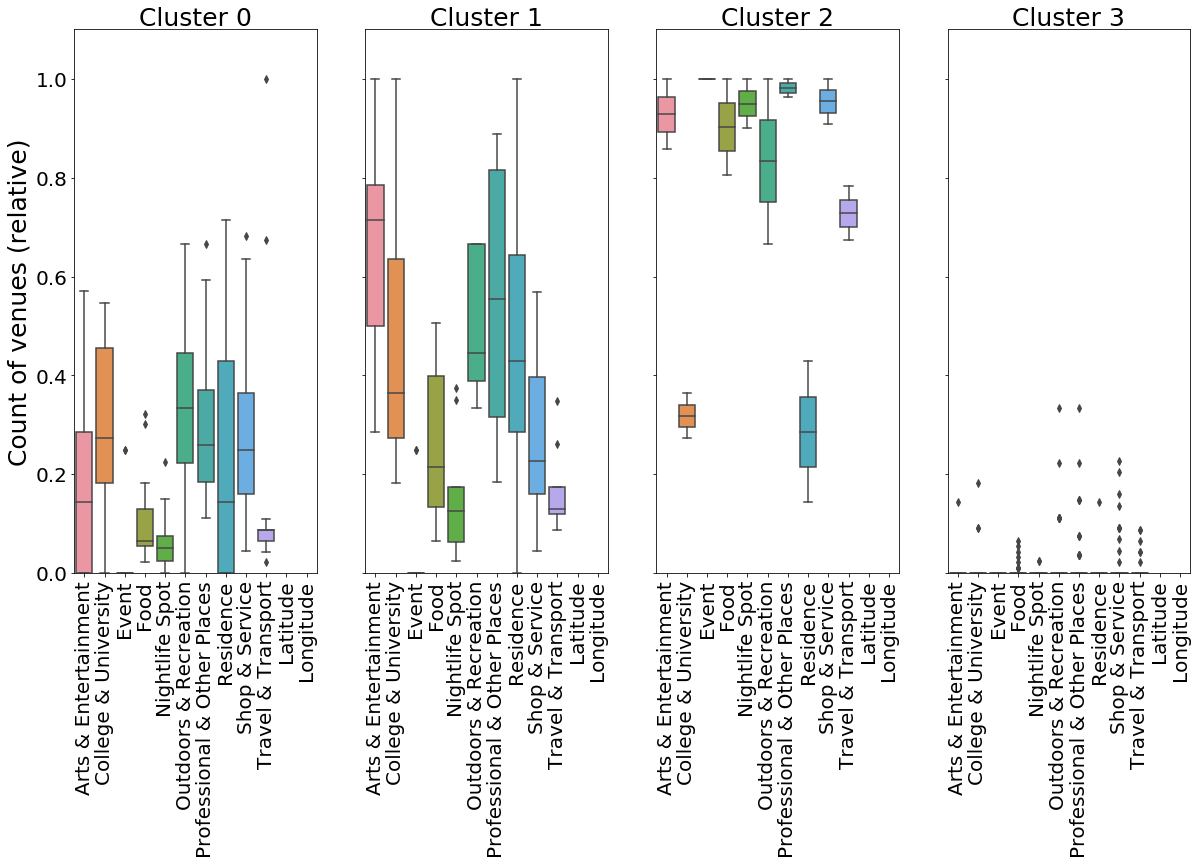

In [125]:
import matplotlib.ticker as ticker

fig, axes = plt.subplots(1,kclusters, figsize=(20, 10), sharey=True)

axes[0].set_ylabel('Count of venues (relative)', fontsize=25)
#plt.set_xlabel('Venue category', fontsize='x-large')

for k in range(kclusters):
    #Set same y axis limits
    axes[k].set_ylim(0,1.1)
    axes[k].xaxis.set_label_position('top')
    axes[k].set_xlabel('Cluster ' + str(k), fontsize=25)
    axes[k].tick_params(labelsize=20)
    plt.sca(axes[k])
    plt.xticks(rotation='vertical')
    sns.boxplot(data = stations_clusters_minmax_df[stations_clusters_minmax_df['Cluster'] == k].drop('Cluster',1), ax=axes[k])

plt.show()

In [126]:
address = 'Delhi, India'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Delhi are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Delhi are 28.6517178, 77.2219388.


In [127]:
cluster_map_delhi = folium.Map(location=[28.6517178,77.2219388], zoom_start=10)


#adding markers
for i, station, lat,long, cluster in zip(stations_clusters_minmax_df.index,
                                         stations_clusters_minmax_df['Station'],
                                         stations_clusters_minmax_df['Latitude'],
                                         stations_clusters_minmax_df['Longitude'],
                                         stations_clusters_minmax_df['Cluster']):
        
    #colors = sns.color_palette(None, kclusters).as_hex()
    colors=['blue','green','orange','red']
    # Calculate top 3 categories for each station
    station_series = stations_clusters_minmax_df.iloc[i]
    top_categories_dict = {}
    for cat in categories_list:
        top_categories_dict[cat[0]] = station_series[cat[0]]
    top_categories = sorted(top_categories_dict.items(), key = lambda x: x[1], reverse=True)
    popup='<b>{}</b><br>Cluster {}<br>1. {} {}<br>2. {} {}<br>3. {} {}'.format(
        station,
        cluster,
        top_categories[0][0],
        "{0:.2f}".format(top_categories[0][1]),
        top_categories[1][0],
        "{0:.2f}".format(top_categories[1][1]),
        top_categories[2][0],
        "{0:.2f}".format(top_categories[2][1]))
    folium.CircleMarker(
        [lat,long],
        fill=True,
        fill_opacity=0.5,
        popup=folium.Popup(popup, max_width = 300),
        radius=5,
        color=colors[cluster]
    ).add_to(cluster_map_delhi)
cluster_map_delhi.save('Cluster_DMRC_Stations.html')
cluster_map_delhi

# Results and Insights from Clusters and Plots

# Cluster 0 (Blue)

In [128]:
cluster_0= stations_clusters_minmax_df[stations_clusters_minmax_df['Cluster']==0]
cluster_0

,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Cluster,Station,Latitude,Longitude
181,0.142857,0.454545,0.25,0.043011,0.050,0.555556,0.222222,0.714286,0.363636,0.086957,0,Paschim Vihar East,28.677398,77.112295
182,0.000000,0.272727,0.00,0.043011,0.025,0.666667,0.111111,0.428571,0.045455,0.065217,0,Paschim Vihar West,28.678651,77.102226
183,0.000000,0.181818,0.00,0.064516,0.025,0.222222,0.370370,0.000000,0.204545,0.086957,0,Peera Garhi,28.679807,77.092679
185,0.000000,0.181818,0.00,0.053763,0.025,0.222222,0.296296,0.142857,0.181818,0.086957,0,Punjabi Bagh,28.672995,77.146124
188,0.000000,0.454545,0.00,0.086022,0.075,0.333333,0.111111,0.142857,0.318182,0.086957,0,Shivaji Park,28.675032,77.130472
193,0.000000,0.272727,0.00,0.021505,0.000,0.333333,0.148148,0.428571,0.136364,0.021739,0,Escorts Mujesar,28.370234,77.314920
197,0.571429,0.272727,0.00,0.118280,0.025,0.111111,0.333333,0.000000,0.545455,0.086957,0,Delhi Gate,28.639204,77.240782
199,0.285714,0.545455,0.25,0.129032,0.050,0.444444,0.259259,0.428571,0.250000,0.086957,0,Old Faridabad,28.576923,77.266026
200,0.285714,0.272727,0.00,0.182796,0.100,0.222222,0.259259,0.714286,0.204545,0.065217,0,Jawaharlal Nehru Stadium,28.583377,77.233540
206,0.142857,0.272727,0.00,0.032258,0.000,0.222222,0.222222,0.000000,0.295455,0.065217,0,Badarpur Border,28.493283,77.303366


# Cluster 1 (GREEN)

In [129]:
cluster_1= stations_clusters_minmax_df[stations_clusters_minmax_df['Cluster']==1]
cluster_1

,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Cluster,Station,Latitude,Longitude
191,0.428571,0.363636,0.00,0.430108,0.350,0.444444,0.444444,0.857143,0.409091,0.108696,1,Khan Market,28.599163,77.226230
192,0.714286,0.272727,0.25,0.451613,0.125,0.666667,0.555556,1.000000,0.545455,0.173913,1,Moolchand,28.564404,77.234278
195,0.714286,1.000000,0.00,0.161290,0.050,0.666667,0.259259,0.428571,0.227273,0.130435,1,Lajpat Nagar,28.656682,77.236612
198,0.857143,0.272727,0.00,0.150538,0.125,0.666667,0.222222,0.428571,0.227273,0.086957,1,Jangpura,28.583041,77.239317
201,0.714286,0.636364,0.00,0.215054,0.050,0.444444,0.370370,0.285714,0.181818,0.130435,1,Jama Masjid,28.650010,77.237676
202,1.000000,0.636364,0.00,0.118280,0.025,0.333333,0.740741,0.000000,0.045455,0.086957,1,ITO,28.628191,77.241073
203,0.285714,0.272727,0.25,0.505376,0.375,0.666667,0.851852,0.857143,0.568182,0.347826,1,Kailash Colony,28.555330,77.241964
204,0.571429,0.272727,0.00,0.365591,0.175,0.444444,0.851852,0.285714,0.295455,0.173913,1,Kalkaji Mandir,28.550373,77.256934
207,0.857143,0.181818,0.00,0.064516,0.075,0.555556,0.185185,0.142857,0.113636,0.130435,1,Bata Chowk,28.385836,77.313462
211,0.428571,0.363636,0.00,0.311828,0.175,0.333333,0.888889,0.428571,0.386364,0.260870,1,Nehru Place,28.548194,77.252047


# CLUSTER 2(YELLOW)

In [130]:
cluster_2= stations_clusters_minmax_df[stations_clusters_minmax_df['Cluster']==2]
cluster_2

,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Cluster,Station,Latitude,Longitude
196,1.000000,0.363636,1.0,0.806452,1.0,1.000000,1.000000,0.428571,1.000000,0.673913,2,Janpath,28.628359,77.219382
219,0.857143,0.272727,1.0,1.000000,0.9,0.666667,0.962963,0.142857,0.909091,0.782609,2,Shivaji Stadium,28.632616,77.213890


# CLUSTER (3) RED

In [131]:
cluster_3= stations_clusters_minmax_df[stations_clusters_minmax_df['Cluster']==3]
cluster_3

,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Cluster,Station,Latitude,Longitude
0,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,3,Adarsh Nagar,28.716580,77.170422
1,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,3,GTB Nagar,28.696038,77.205932
2,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,3,Guru Dronacharya,28.482021,77.102269
3,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,3,Haiderpur,28.730121,77.149403
4,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,3,Hauz Khas,28.544256,77.206707
5,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,3,HUDA City Centre,28.459343,77.072657
6,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,3,IFFCO Chowk,28.477172,77.068221
7,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,3,INA,28.575120,77.209431
8,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,3,Jahangirpuri,28.725972,77.162658
9,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,3,Jor Bagh,28.586598,77.212534


# DISCUSSION

# Conclusion